# Multimedia Project --
## Retrieving Frames

In [1]:
from perceptual.filterbank import *
import ffmpeg
import cv2
import numpy as np
import pandas as pd
import colorsys
import matplotlib.pyplot as plt

# determine what OpenCV version we are using
try:
    import cv2.cv as cv
    USE_CV2 = True
    print("yes")
except ImportError:
    # OpenCV 3.x does not have cv2.cv submodule
    USE_CV2 = False
    
import sys
from skimage import color
from skimage import io
from cvtools import ipynb_show_cv2_image
from cvtools import ipynb_show_matrix
from cvtools import VideoReader

In [2]:
def yiq_to_rgb_new(y, i, q):
    r = y + 0.948262*i + 0.624013*q
    g = y - 0.276066*i - 0.639810*q
    b = y - 1.105450*i + 1.729860*q

    return (r, g, b)

In [3]:
# import datetime
# from cvtools import ipynb_show_cv2_image
# from cvtools import VideoReader

# vidFname = 'nba.mp4'

# video_reader = VideoReader()

# video_reader.open(vidFname)


# # Video duration (in seconds).
# video_duration = float(
#     video_reader.get_number_of_frames()) / float(video_reader.get_frame_rate())

# print('resolution: %d x %d' % (video_reader.get_width(), video_reader.get_height()))
# print('number of frames: %d' % video_reader.get_number_of_frames())
# print('duration: %s' % datetime.timedelta(seconds=video_duration))


In [4]:
# # Re-open the video to now process it from the start.
# video_reader = VideoReader()
# video_reader.open(vidFname)

# # Read a number of video frames (say, the first 10 seconds).
# video_fps = video_reader.get_frame_rate()
# print(video_fps)
# sampling_period = int(1.0 * video_fps)  # One every 3 seconds.
# stop_at = int(20.0 * video_fps)  # For the first 10 seconds.
# plt.clf()
# %matplotlib inline

# for frame in video_reader.get_frames():
#   index = video_reader.get_current_frame_index()
#   if 0 != index % sampling_period:
#     continue
#   ipynb_show_cv2_image(frame, 'frame %d' % index)
#   if index > stop_at:
#     break

(480, 852, 3)
(480, 852, 3)


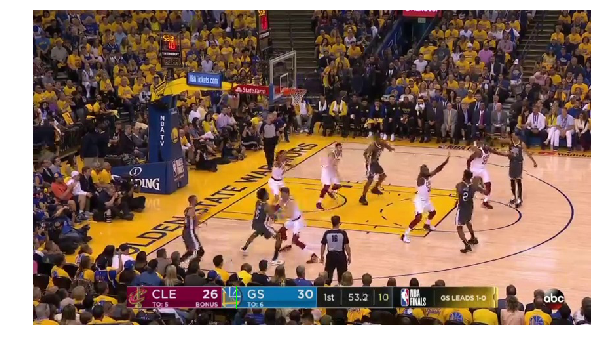

In [5]:
from cvtools import ipynb_show_cv2_image
from cvtools import ipynb_show_matrix

image = cv2.imread('frames/frame0.jpg')
print(np.shape(image))

image_modified = image.copy()
print(np.shape(image_modified))

cv2.rectangle(image_modified, (160, 420), (285, 455), (0, 0, 255))
cv2.rectangle(image_modified, (310, 420), (430, 455), (0, 255, 0))
plt.clf()
ipynb_show_cv2_image(image_modified, figsize=(10, 10))  
plt.show()


In [6]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist

channel_index=0

error = np.abs(
        red0[:,:,channel_index] - red1[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        red0[:,:,channel_index] - red2[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        red100[:,:,channel_index] - red0[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

######@# blue
print("blue:")
error = np.abs(
        blue0[:,:,channel_index] - blue1[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        blue0[:,:,channel_index] - blue2[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        blue100[:,:,channel_index] - blue0[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)


NameError: name 'red0' is not defined

### New

In [7]:
def crop_img_to_grey(image_modified):
    cropRedImg = image_modified[424:444,258:284]
    cropBlueImg = image_modified[424:444,400:429]
#     ipynb_show_cv2_image(cropRedImg, figsize=(5, 5)) 
#     ipynb_show_cv2_image(cropBlueImg, figsize=(5, 5)) 
    Img_Red = color.rgb2gray(cropRedImg)
    Img_Blue = color.rgb2gray(cropBlueImg)
    return Img_Red,Img_Blue

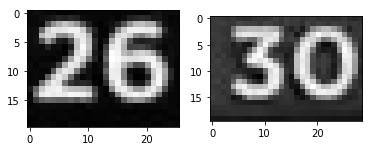

In [8]:
image1 = cv2.imread('frames/frame2.jpg')
red0,blue0 = crop_img_to_grey(image1)
plt.clf()
plt.subplot(1, 2, 1)
plt.imshow(red0,cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(blue0,cmap='gray')
plt.show()

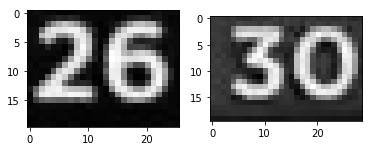

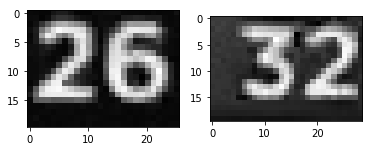

In [9]:
image1 = cv2.imread('frames/frame2.jpg')
image2 = cv2.imread('frames/frame12.jpg')

# red0,blue0 = crop_img_to_grey(image_modified)
red1,blue1 = crop_img_to_grey(image1)
red2,blue2 = crop_img_to_grey(image2)
# plt.figure()
# plt.clf()
# plt.subplot(1, 2, 1)
# plt.imshow(red0,cmap = 'gray')
# plt.subplot(1, 2, 2)
# plt.imshow(blue0,cmap='gray')
# plt.show()

plt.figure()
plt.clf()
plt.subplot(1, 2, 1)
plt.imshow(red1,cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(blue1,cmap='gray')
plt.show()

plt.figure()
plt.clf()
plt.subplot(1, 2, 1)
plt.imshow(red2,cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(blue2,cmap='gray')
plt.show()



# red100,blue100 = crop_img(cv2.imread('frames/frame251.jpg'))

In [10]:
#abs test
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist
goal = []
prev = 0
curr = 1
for i in np.arange(3,40):
    if prev == 0:
        prev = i-1
        curr = i
#     image1 = cv2.imread('frames/frame'+str(prev)+'.jpg')
#     image2 = cv2.imread('frames/frame'+str(curr)+'.jpg')
    image1 = cv2.imread('frames/frame'+str(i-1)+'.jpg')
    image2 = cv2.imread('frames/frame'+str(i)+'.jpg')
    red0,blue0 = crop_img_to_grey(image1)
    red1,blue1 = crop_img_to_grey(image2)
# red2,blue2 = crop_img_to_grey(image2)

#     error_Red01 = np.sqrt(np.sum(np.square(red0-red1)))
#     error_Blue01 = np.sqrt(np.sum(np.square(blue0-blue1)))
    error_Red01 = np.sum(np.abs(red0-red1))
    error_Blue01 = np.sum(np.abs(blue0-blue1))
    print('error in grayscale: Red:%.3f , Blue:%.3f'%(error_Red01,error_Blue01))
    if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
        prev = i
        curr +=1
        goal.append(i)
        
    else:
        curr+=1

print(goal)




error in grayscale: Red:3.035 , Blue:4.798
error in grayscale: Red:13.508 , Blue:13.959
error in grayscale: Red:4.868 , Blue:6.237
error in grayscale: Red:2.681 , Blue:3.125
error in grayscale: Red:4.450 , Blue:3.684
error in grayscale: Red:12.808 , Blue:13.694
error in grayscale: Red:1.709 , Blue:3.292
error in grayscale: Red:2.731 , Blue:2.728
error in grayscale: Red:4.059 , Blue:19.116
error in grayscale: Red:14.409 , Blue:66.414
error in grayscale: Red:5.684 , Blue:7.921
error in grayscale: Red:5.618 , Blue:7.516
error in grayscale: Red:5.057 , Blue:5.353
error in grayscale: Red:5.733 , Blue:6.373
error in grayscale: Red:16.516 , Blue:15.242
error in grayscale: Red:5.596 , Blue:4.893
error in grayscale: Red:4.857 , Blue:6.435
error in grayscale: Red:4.165 , Blue:5.065
error in grayscale: Red:13.709 , Blue:15.324
error in grayscale: Red:4.968 , Blue:4.756
error in grayscale: Red:5.974 , Blue:7.259
error in grayscale: Red:2.482 , Blue:4.609
error in grayscale: Red:14.282 , Blue:14.47

In [11]:
# #abs test
# # read vedio and process the img at the same time
# # Simple dissimilarity is applied here image-image (pixel by pixel)

# vidFname = 'nba.mp4'

# vidReader = cv2.VideoCapture(vidFname)
# vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
# fps = vidReader.get(cv2.CAP_PROP_FPS)
# print(vidFrames,fps)
# #49485 = 35* 23* 60
# success,image = vidReader.read()
# #(480, 852, 3)

# red0,blue0 = crop_img_to_grey(image)

# # ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# # ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
# images_red = {}
# images_blue = {}
# errors_red = {}
# errors_blue = {}
# highlight = []
# count = 0
# while success:
#     # Extracting every 20 frames

#     for i in range(40):
#         success,image = vidReader.read()
    
#     success,image = vidReader.read()
    
#     #print('Read a new frame: ', success)
#     count += 1
    
#     if success == False:
#         print("break")
#         break
#     red1,blue1 = crop_img_to_grey(image)
    
#     error_Red01 = np.sum(np.abs(red0-red1))
#     error_Blue01 = np.sum(np.abs(blue0-blue1))
# #     if ((error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15)) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
#     if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
#         red0 = red1
#         blue0 = blue1
#         count = count*40/fps
#         highlight.append(float(count))
#         images_red[count] = red1
#         images_blue[count] = blue1
#         errors_red[count] = error_Red01
#         errors_blue[count] = error_Blue01
        
# print("done")
# print(len(highlight))
# print(highlight)

In [12]:
#abs test
# read vedio and process the img at the same time
# Simple dissimilarity is applied here image-image (pixel by pixel)

vidFname = 'nba.mp4'

vidReader = cv2.VideoCapture(vidFname)
vidReader.set(cv2.CAP_PROP_FPS,1)
fps = vidReader.get(cv2.CAP_PROP_FPS)
print(fps)
vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
print(vidFrames,fps)
#49485 = 35* 23* 60
success,image = vidReader.read()
#(480, 852, 3)

red0,blue0 = crop_img_to_grey(image)

# ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
images_red = {}
images_blue = {}
errors_red = {}
errors_blue = {}
highlight = []

count = 0
frame_count = 0
print(np.ceil(fps))
while success:
# for i in range(1000):
    # Extracting every 20 frames
    success,image = vidReader.read()
        
    if (frame_count % np.ceil(fps)) == 0:
#         print("%d second"%(i / np.ceil(fps)))
        try:
            red1,blue1 = crop_img_to_grey(image)
        except:
            print(success)
            print(i / np.ceil(fps))
        error_Red01 = np.sum(np.abs(red0-red1))
        error_Blue01 = np.sum(np.abs(blue0-blue1))
#         print(error_Red01,error_Blue01)
#         plt.subplot(1, 2, 1)
#         plt.imshow(red1,cmap = 'gray')
#         plt.subplot(1, 2, 2)
#         plt.imshow(blue1,cmap='gray')
#         plt.show()
        if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
            red0 = red1
            blue0 = blue1
            highlight.append(int(frame_count/np.ceil(fps)))
            images_red[count] = red1
            images_blue[count] = blue1
            errors_red[count] = error_Red01
            errors_blue[count] = error_Blue01
            count+=1
    frame_count+=1
print("done")
print(len(highlight))
print(highlight)

29.999154597179764
49485 29.999154597179764
30.0
done
31
[9, 21, 22, 257, 313, 360, 437, 438, 562, 659, 674, 712, 755, 787, 788, 814, 987, 1011, 1072, 1133, 1254, 1273, 1295, 1296, 1309, 1310, 1364, 1365, 1416, 1434, 1499]


9


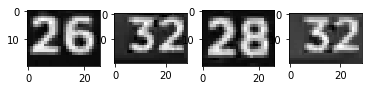

21 70.12585960784314 18.129013725490196


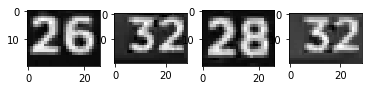

22 52.64059568627451 12.813109019607841


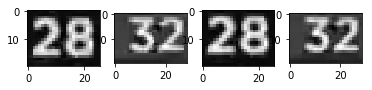

257 16.32039882352941 61.30961176470588


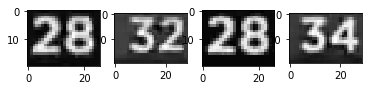

313 90.73861098039215 18.55961882352942


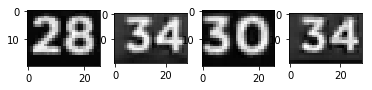

360 17.39781529411765 64.96950235294118


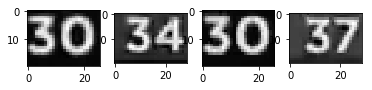

437 12.877666274509806 93.06721215686275


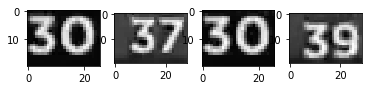

438 16.220444705882358 91.13710392156864


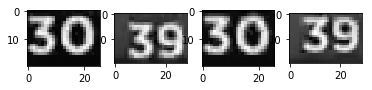

562 89.65009529411765 15.537326666666667


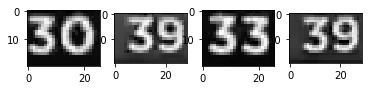

659 15.850821176470589 66.87163843137256


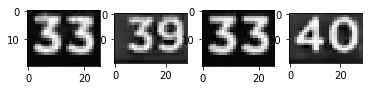

674 52.65980862745098 14.55078196078431


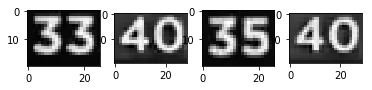

712 56.82644549019608 11.29322431372549


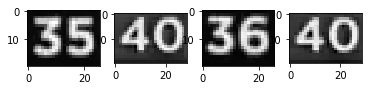

755 14.075841960784315 70.80013294117647


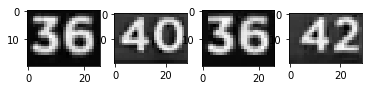

787 12.003374901960784 77.87774588235294


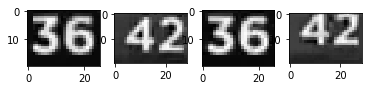

788 4.219002352941178 70.9088674509804


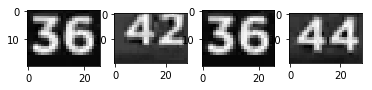

814 12.96636980392157 68.34291215686275


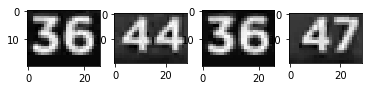

987 88.67043607843136 16.89775843137255


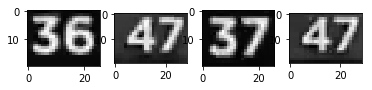

1011 37.526080392156864 60.34868862745098


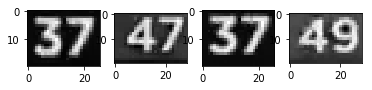

1072 72.41972196078433 23.967165882352944


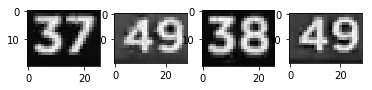

1133 15.245565882352942 75.08451764705883


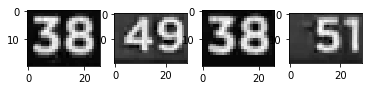

1254 99.45909568627451 15.817390588235295


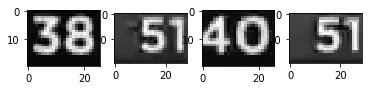

1273 96.87994823529411 13.602867843137254


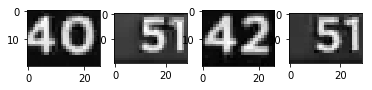

1295 99.39802862745098 11.934040784313726


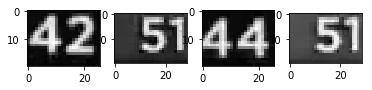

1296 52.61661294117647 13.580276862745102


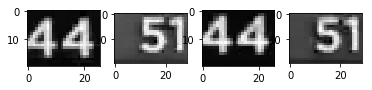

1309 15.306180392156863 55.095492941176474


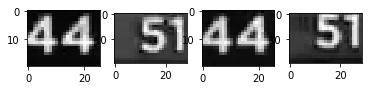

1310 5.464463137254905 89.35251019607843


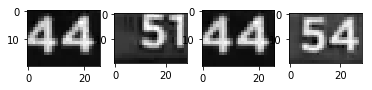

1364 11.684850196078429 86.61708235294118


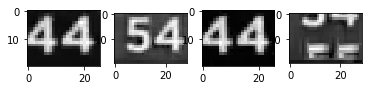

1365 13.547360784313726 78.53737764705883


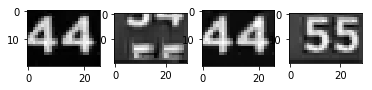

1416 15.630324313725492 62.69336235294118


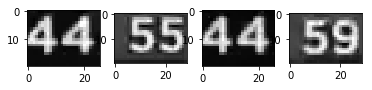

1434 15.423413333333333 50.74674588235294


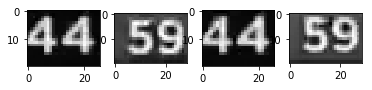

1499 65.93939607843137 19.15837843137255


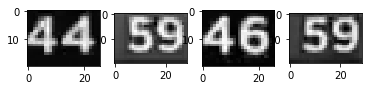

In [13]:
plt.clf()
for i in range(len(highlight)):
    if i ==0:
        print(highlight[i])
        red1 = images_red[i]
        blue1 = images_blue[i]
        red2 = images_red[i+1]
        blue2 = images_blue[i+1]
        plt.subplot(1, 4, 1)
        plt.imshow(red1,cmap = 'gray')
        plt.subplot(1, 4, 2)
        plt.imshow(blue1,cmap='gray')
        plt.subplot(1, 4, 3)
        plt.imshow(red2,cmap = 'gray')
        plt.subplot(1, 4, 4)
        plt.imshow(blue2,cmap='gray')
        plt.show()
    else:
        red1 = images_red[i-1]
        blue1 = images_blue[i-1]
        red2 = images_red[i]
        blue2 = images_blue[i]
        print(highlight[i],errors_red[i],errors_blue[i])
        plt.figure()
        plt.clf()
        plt.subplot(1, 4, 1)
        plt.imshow(red1,cmap = 'gray')
        plt.subplot(1, 4, 2)
        plt.imshow(blue1,cmap='gray')
        plt.subplot(1, 4, 3)
        plt.imshow(red2,cmap = 'gray')
        plt.subplot(1, 4, 4)
        plt.imshow(blue2,cmap='gray')
        plt.show()

In [26]:
highlight_1 = highlight.copy()
prev_time = 0
for time in highlight:
    if time - prev_time < 2:
        highlight_1.remove(time)
    prev_time = time    
        

print(len(highlight),len(highlight_1))

31 25


In [27]:
file_list = []
name_ = 'file '
with open('files.txt','w') as f:
    for idx,time in enumerate(highlight_1):
        start = str(time-10)
        end = str(time+3)
        if idx != len(highlight_1):
            file_name = name_+"'video/cut"+str(idx)+".mp4'\n"
        else:
            file_name = name_+"'video/cut"+str(idx)+".mp4'\n"
        f.write(str(file_name))
        


In [31]:
#!ffmpeg -ss 00:01:00 -i nba.mp4 -to 00:02:00 -c copy cut.mp4
import ffmpeg
import os
file_list = []
name_ = ' video/cut'
for idx,time in enumerate(highlight_1):
    start = str(time-10)
    end = str(time+3)
    file_name = name_+str(idx)+'.mp4'
    command = "ffmpeg -ss "+start+" -to " + end + " -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1 " + file_name
    print(command)
    os.system(command)



ffmpeg -ss -1 -to 12 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut0.mp4
ffmpeg -ss 11 -to 24 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut1.mp4
ffmpeg -ss 247 -to 260 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut2.mp4
ffmpeg -ss 303 -to 316 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut3.mp4
ffmpeg -ss 350 -to 363 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut4.mp4
ffmpeg -ss 427 -to 440 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut5.mp4
ffmpeg -ss 552 -to 565 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut6.mp4
ffmpeg -ss 649 -to 662 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut7.mp4
ffmpeg -ss 664 -to 677 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut8.mp4
ffmpeg -ss 702 -to 715 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut9.mp4
ffmpeg -ss 745 -to 758 -

In [32]:
# ffmpeg -f concat -i textfile -c copy -fflags +genpts merged.mp4
# command_concat = 'cat video/cut0.mp4 video/cut1.mp4 > video/movie3.mp4'
command_concat = "ffmpeg -f concat -i files.txt -map 0 -fflags +genpts -c copy video/movie3.mp4"

os.system(command_concat)

0

In [23]:
#!ffmpeg -ss 00:01:00 -i nba.mp4 -to 00:02:00 -c copy cut.mp4
import ffmpeg
import os
file_list = []
name_ = ' video2/cut'
for idx,time in enumerate(highlight_1):
    start = str(time-10)
    end = str(time+3)
    file_name = name_+str(idx)+'.mp4'
    command = "ffmpeg -ss "+start+" -to " + end + " -i nba.mp4 -codec copy" + file_name
    #command = "ffmpeg -i nba.mp4 -ss "+start+" -c copy -to "+end+ file_name
#     command_concat_2 ="ffmpeg -fflags +genpts -i nba.mp4 -map 0 -c copy -f segment -segment_format mp4 -ss "+start+" -segment_time 13 -to "+end+" -segment_list video"+str(idx)+".ffcat -reset_timestamps 1 -v error chunk-%04d.mp4"
    print(command)
    os.system(command)







ffmpeg -ss -1 -t 12 -i nba.mp4 -codec copy video2/cut0.mp4
ffmpeg -ss 11 -t 24 -i nba.mp4 -codec copy video2/cut1.mp4
ffmpeg -ss 247 -t 260 -i nba.mp4 -codec copy video2/cut2.mp4
ffmpeg -ss 303 -t 316 -i nba.mp4 -codec copy video2/cut3.mp4
ffmpeg -ss 350 -t 363 -i nba.mp4 -codec copy video2/cut4.mp4
ffmpeg -ss 427 -t 440 -i nba.mp4 -codec copy video2/cut5.mp4
ffmpeg -ss 552 -t 565 -i nba.mp4 -codec copy video2/cut6.mp4
ffmpeg -ss 649 -t 662 -i nba.mp4 -codec copy video2/cut7.mp4
ffmpeg -ss 664 -t 677 -i nba.mp4 -codec copy video2/cut8.mp4
ffmpeg -ss 702 -t 715 -i nba.mp4 -codec copy video2/cut9.mp4
ffmpeg -ss 745 -t 758 -i nba.mp4 -codec copy video2/cut10.mp4
ffmpeg -ss 777 -t 790 -i nba.mp4 -codec copy video2/cut11.mp4
ffmpeg -ss 804 -t 817 -i nba.mp4 -codec copy video2/cut12.mp4
ffmpeg -ss 977 -t 990 -i nba.mp4 -codec copy video2/cut13.mp4
ffmpeg -ss 1001 -t 1014 -i nba.mp4 -codec copy video2/cut14.mp4
ffmpeg -ss 1062 -t 1075 -i nba.mp4 -codec copy video2/cut15.mp4
ffmpeg -ss 1123 -t

In [249]:
# command_concat_2 ="ffmpeg -fflags +genpts -i nba.mp4 -map 0 -c copy -f segment -segment_format mp4 -ss 50 -segment_time 13 -to 63 -segment_list video.ffcat -reset_timestamps 1 -v error chunk-%03d.mp4"
# command_concat_2 ="ffmpeg -fflags +genpts -i nba.mp4 -map 0 -c copy -f segment -segment_format mp4 -ss 20 -segment_time 13 -to 33 -segment_list video.ffcat -reset_timestamps 1 -v error chunk-%04d.mp4"
os.system(command_concat_2)
# ffmpeg -y -v error -i Test.ffcat -map 0 -c copy output.avi

0

In [ ]:
for i in np.arange(0,len(highlight)):
    if i ==0:
        continue
    red1 = images_red[highlight[i-1]]
    blue1 = images_blue[highlight[i-1]]
    red2 = images_red[highlight[i]]
    blue2 = images_blue[highlight[i]]
    print(highlight[i],errors_red[highlight[i]],errors_blue[highlight[i]])
    plt.figure()
    plt.clf()
    plt.subplot(1, 4, 1)
    plt.imshow(red1,cmap = 'gray')
    plt.subplot(1, 4, 2)
    plt.imshow(blue1,cmap='gray')
    plt.subplot(1, 4, 3)
    plt.imshow(red2,cmap = 'gray')
    plt.subplot(1, 4, 4)
    plt.imshow(blue2,cmap='gray')
    plt.show()

In [ ]:
import os

h=str(70)
h_i = str(230)
command = "ffmpeg -i nba.mp4 -ss "+h+" -c copy -to "+h_i+" cut.mp4"
os.system(command)
# command


In [ ]:
highlight2 = [23 ,30 ,35 ,40]

In [ ]:
#euclidian
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist
goal = []
prev = 0
curr = 1
for i in np.arange(3,40):
    if prev == 0:
        prev = i-1
        curr = i
    image1 = cv2.imread('frames/frame'+str(prev)+'.jpg')
    image2 = cv2.imread('frames/frame'+str(curr)+'.jpg')
#     print('i:%d'%i)
    red0,blue0 = crop_img_to_grey(image1)
    red1,blue1 = crop_img_to_grey(image2)
# red2,blue2 = crop_img_to_grey(image2)

    error_Red01 = np.sqrt(np.sum(np.square(red0-red1)))
    error_Blue01 = np.sqrt(np.sum(np.square(blue0-blue1)))
    print('error in grayscale: Red:%.3f , Blue:%.3f'%(error_Red01,error_Blue01))
    if (error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
        prev = i
        curr +=1
        goal.append(i)
        
    else:
        curr+=1

print(goal)



In [ ]:
# read vedio and process the img at the same time
# Simple dissimilarity is applied here image-image (pixel by pixel)

vidFname = 'nba.mp4'

vidReader = cv2.VideoCapture(vidFname)
vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
#49485 = 35* 23* 60
success,image = vidReader.read()
#(480, 852, 3)

red0,blue0 = crop_img_to_grey(image)

# ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
images_red = {}
images_blue = {}
errors_red = {}
errors_blue = {}
highlight = []
count = 0
while success:
    # Extracting every 20 frames

    for i in range(35):
        success,image = vidReader.read()
    
    success,image = vidReader.read()
    
    #print('Read a new frame: ', success)
    count += 1
    
    if success == False:
        print("break")
        break
    red1,blue1 = crop_img_to_grey(image)
    
    error_Red01 = np.sqrt(np.sum(np.square(red0-red1)))
    error_Blue01 = np.sqrt(np.sum(np.square(blue0-blue1)))
#     if ((error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15)) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
    if ( (3< error_Red01 < 10) or (3<  error_Blue01 < 10) ) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
        red0 = red1
        blue0 = blue1
        highlight.append(count)
        images_red[count] = red1
        images_blue[count] = blue1
        errors_red[count] = error_Red01
        errors_blue[count] = error_Blue01
        
print("done")
print(len(highlight))
print(highlight)

In [ ]:
for i in np.arange(1,len(highlight)):
    red1 = images_red[highlight[i]]
    blue1 = images_blue[highlight[i]]
    red2 = images_red[highlight[i+1]]
    blue2 = images_blue[highlight[i+1]]
    print(errors_red[highlight[i]],errors_blue[highlight[i]])
    plt.figure()
    plt.clf()
    plt.subplot(1, 4, 1)
    plt.imshow(red1,cmap = 'gray')
    plt.subplot(1, 4, 2)
    plt.imshow(blue1,cmap='gray')
    plt.subplot(1, 4, 3)
    plt.imshow(red2,cmap = 'gray')
    plt.subplot(1, 4, 4)
    plt.imshow(blue2,cmap='gray')
    plt.show()

In [ ]:
vidFname = 'nba.mp4'
video_reader = VideoReader()
video_reader.open(vidFname)

# Read a number of video frames (say, the first 10 seconds).
video_fps = video_reader.get_frame_rate()
print(video_fps)
sampling_period = int(1 * video_fps)  # One every 3 seconds.
print(video_duration)
stop_at = int(video_duration * video_fps)  # For the first 10 seconds.
plt.clf()
%matplotlib inline


#(480, 852, 3)
vidReader = VideoCapture(vidFname)
vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
#49485 = 35* 23* 60
success,image = vidReader.read()
#(480, 852, 3)

red0,blue0 = crop_img_to_grey(image)

# ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
images_red = {}
images_blue = {}
errors_red = {}
errors_blue = {}
highlight = []

for frame in video_reader.get_frames():
    index = video_reader.get_current_frame_index()
    if 0 != index % int(sampling_period*1.3):
        continue
    
    red1,blue1 = crop_img_to_grey(frame)

    error_Red01 = np.sum(np.abs(red0-red1))
    error_Blue01 = np.sum(np.abs(blue0-blue1))
#    if ((error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15)) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
    if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
        
        red0 = red1
        blue0 = blue1
        count = index/video_fps
        #print(video_fps)
        print(index,count)
        ipynb_show_cv2_image(frame, 'frame %d' % count)
        highlight.append(count)
        images_red[count] = red1
        images_blue[count] = blue1
        errors_red[count] = error_Red01
        errors_blue[count] = error_Blue01
    
    if index > stop_at:
        break

    
print("done")
print(len(highlight))
print(highlight)
